<a href="https://colab.research.google.com/github/HepinR/Twitter-Sentiment-Project/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
!pip install keras

In [5]:
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics import classification_report,confusion_matrix

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM,Dense, SpatialDropout1D, Dropout
from keras.initializers import Constant

load all of data

In [8]:
train=pd.read_csv("/content/twitter_training.csv")
validation=pd.read_csv("/content/twitter_validation.csv")

As we can see there are no column name present in datasets so,



At first put name for each column:

In [9]:
train.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
train.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [10]:
validation.columns=['Tweet ID','Entity','Sentiment','Tweet Content']
validation.head()

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [11]:
train.info()
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       74681 non-null  int64 
 1   Entity         74681 non-null  object
 2   Sentiment      74681 non-null  object
 3   Tweet Content  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiment      999 non-null    object
 3   Tweet Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


Check the null values of data:

In [12]:
train.isnull().sum()

,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet Content,686


In [13]:
validation.isnull().sum()

,0
Tweet ID,0
Entity,0
Sentiment,0
Tweet Content,0


Check the duplicate values in data:

In [14]:
train.duplicated().sum()

2700

In [15]:
train.dropna(subset=['Tweet Content'], inplace=True)

In [16]:
duplicates = train[train.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
train = train.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

In [17]:
duplicates = validation[validation.duplicated(subset=['Entity', 'Sentiment', 'Tweet Content'], keep=False)]
validation = validation.drop_duplicates(subset=['Entity', 'Sentiment', 'Tweet Content'], keep='first')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70957 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       70957 non-null  int64 
 1   Entity         70957 non-null  object
 2   Sentiment      70957 non-null  object
 3   Tweet Content  70957 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [19]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet ID       999 non-null    int64 
 1   Entity         999 non-null    object
 2   Sentiment      999 non-null    object
 3   Tweet Content  999 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.3+ KB


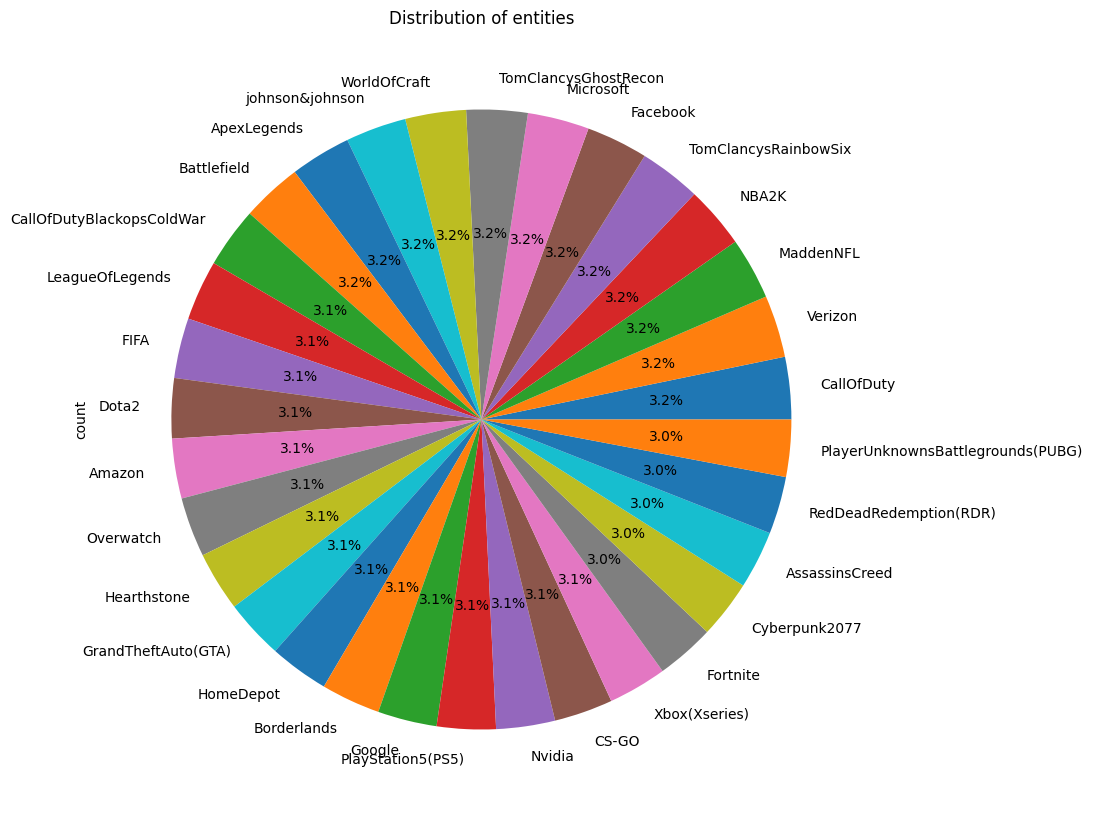

In [20]:
Entities=train['Entity'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of entities')
plt.show()

Text(0.5, 1.0, 'Sentiment Distribution Train')

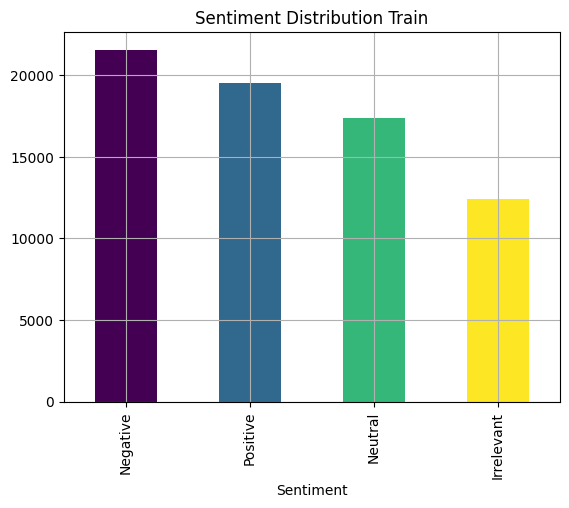

In [21]:
sentiment_content=train['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)
plt.title('Sentiment Distribution Train')

Text(0.5, 1.0, 'Sentiment Distribution Validation')

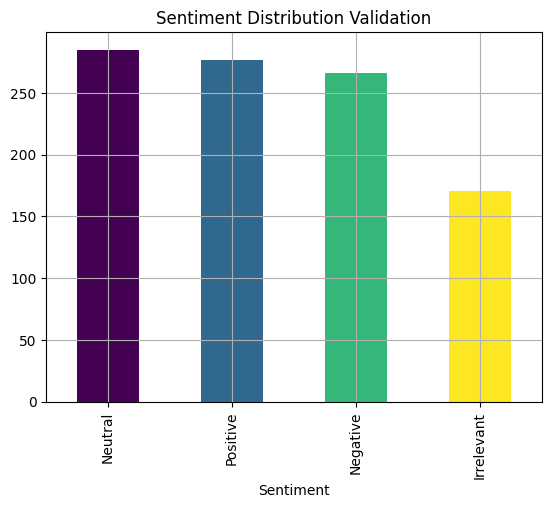

In [22]:
sentiment_content=validation['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)
plt.title('Sentiment Distribution Validation')

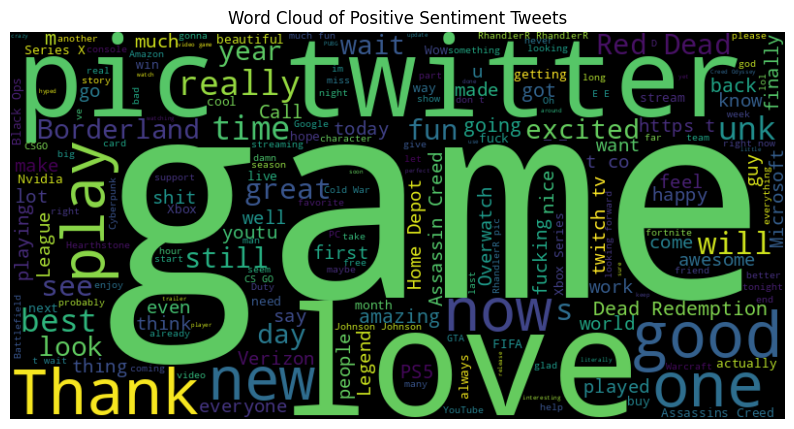

In [23]:
positive_tweets = train[train["Sentiment"] == "Positive"]["Tweet Content"]
positive_text = ' '.join(positive_tweets)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiment Tweets')
plt.show()

Now count the frequency of each word from Word Cloud of positive sentiment tweets

In [24]:
from wordcloud import STOPWORDS
from collections import Counter

words = positive_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('I', 7817),
 ('.', 2394),
 ('/', 2363),
 ('@', 2336),
 ('game', 1562),
 ('The', 1392),
 ('love', 1291),
 ('really', 1113),
 ("I'm", 1088),
 ('good', 1071),
 ('-', 935),
 ('new', 927),
 ('2', 900),
 ('This', 880),
 ('play', 851),
 ('will', 828),
 ('best', 815),
 ('playing', 778),
 ('one', 740),
 ('3', 692)]

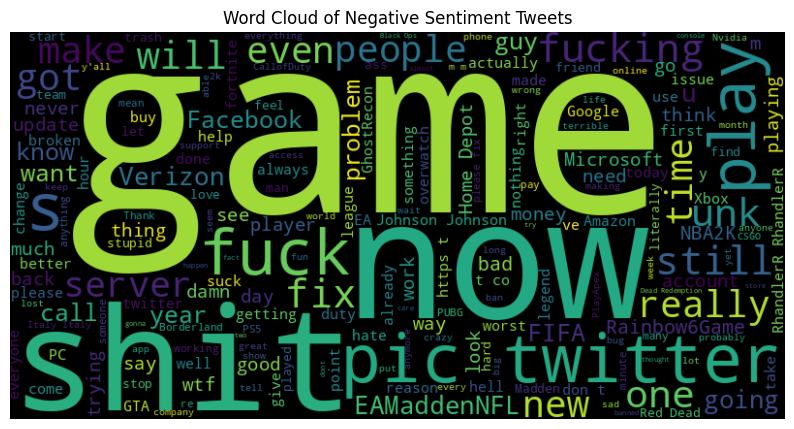

In [25]:
negative_tweets = train[train["Sentiment"] == "Negative"]["Tweet Content"]
negative_text = ' '.join(negative_tweets)
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Sentiment Tweets')
plt.show()

In [26]:
words = negative_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('I', 8533),
 ('@', 4619),
 ('game', 2777),
 ('/', 2246),
 ('.', 1527),
 ('The', 1083),
 ('shit', 1052),
 ('fix', 1030),
 ('play', 997),
 ('still', 953),
 ('’', 943),
 ('now', 940),
 ('fucking', 866),
 ('will', 866),
 ('really', 865),
 ('even', 861),
 ('This', 837),
 ('&', 834),
 ('got', 787),
 ('one', 784)]

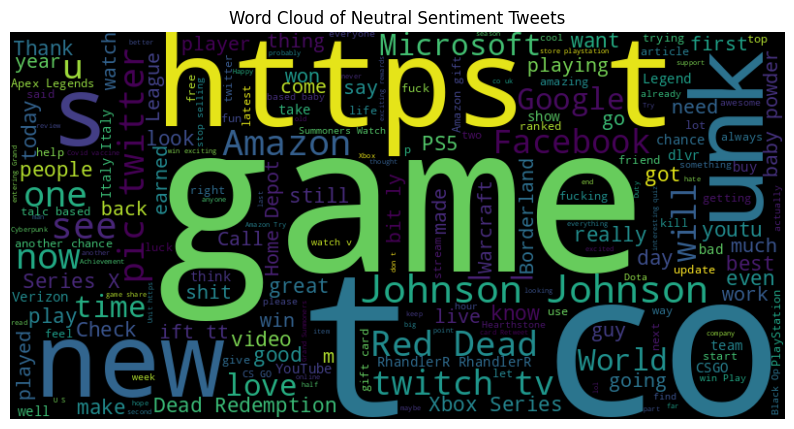

In [27]:
neutral_tweets = train[train["Sentiment"] == "Neutral"]["Tweet Content"]
neutral_text = ' '.join(neutral_tweets)
wordcloud = WordCloud(width=800, height=400).generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Sentiment Tweets')
plt.show()

In [28]:
words = neutral_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('/', 7444),
 ('I', 4647),
 ('.', 3501),
 ('@', 2354),
 ('-', 2291),
 ('Johnson', 1630),
 ('The', 1590),
 ('&', 1363),
 ('_', 1050),
 ('2', 955),
 ('Amazon', 804),
 ('game', 768),
 ('will', 719),
 ('now', 615),
 ('A', 587),
 ('…', 587),
 ('Facebook', 565),
 ("I'm", 556),
 ('see', 539),
 ('Microsoft', 537)]

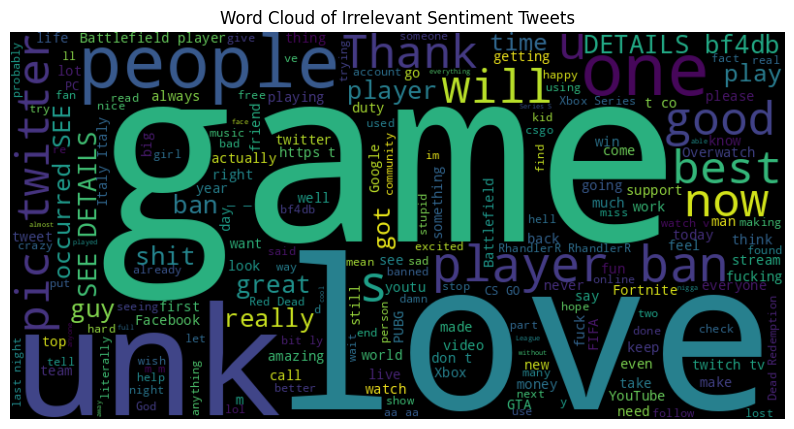

In [29]:
Irrelevant_tweets = train[train["Sentiment"] == "Irrelevant"]["Tweet Content"]
Irrelevant_text = ' '.join(Irrelevant_tweets)
wordcloud = WordCloud(width=800, height=400).generate(Irrelevant_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Irrelevant Sentiment Tweets')
plt.show()

In [30]:
words = Irrelevant_text.split()
word_freq = Counter(word for word in words if word not in STOPWORDS)
top_words = word_freq.most_common(20)

top_words

[('I', 3691),
 ('/', 2537),
 ('.', 2238),
 ('@', 1667),
 ('The', 878),
 ('player', 786),
 ('A', 674),
 ('ban', 674),
 ('-', 659),
 ('people', 599),
 ('_', 588),
 ('4', 557),
 ('This', 544),
 ('will', 540),
 ('game', 519),
 ('one', 510),
 ('love', 505),
 ("I'm", 489),
 ('see', 487),
 ('Battlefield', 478)]

In [31]:
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical

import pandas as pd
from sklearn.model_selection import train_test_split

Train Test Split

In [32]:
data = train[['Tweet Content', 'Sentiment']]
data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
data['Sentiment'] = data['Sentiment_label'].cat.codes

data_train, data_test = train_test_split(data, test_size = 0.1)

data_train.head(10)

<ipython-input-32-e3954e870d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment_label'] = pd.Categorical(data['Sentiment'])
<ipython-input-32-e3954e870d4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sentiment'] = data['Sentiment_label'].cat.codes


,Tweet Content,Sentiment,Sentiment_label
41903,The Russian bots are aggravating Battlefield 1,2,Neutral
54406,to wazone plunder should be made a real perman...,3,Positive
10410,Damned,0,Irrelevant
18766,I just earned an [Halls Against Devotion] Achi...,2,Neutral
73698,Shout out to everyone whose RTX 20x0 GPUs have...,2,Neutral
38124,My power over you will be even stronger.,3,Positive
10658,How many of you will bought the season 6 survi...,0,Irrelevant
71300,"@GhostRecon How do we fix the Cursor issue, no...",1,Negative
63017,My boy got the cannon but his accuracy shaky a...,2,Neutral
50521,Why no one wants to sign for my @ FGRFC _ Offi...,1,Negative


In [33]:
data_test.head(10)

,Tweet Content,Sentiment,Sentiment_label
65500,if they're going in vigorously defend their pr...,1,Negative
3066,It looks like Call of Duty: Black Ops Cold War...,1,Negative
65407,Not Johnson & Johnson with ads about how they ...,2,Neutral
1686,New Deal (Epic Store Free Games release schedu...,2,Neutral
67525,"For the love of God, people, PRAYER...",0,Irrelevant
63454,people curse,2,Neutral
55509,2 Looking back out on old files on playing a h...,2,Neutral
74235,"Nvidia does some shady shit, but you gotta giv...",2,Neutral
57667,Fix you fucking shit game ubi @ Rainbow6Game @...,1,Negative
62393,Omo the way i dey abuse cars for this GTA no b...,2,Neutral


BERT

In [41]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.0 MB/s eta 0:00:00


In [51]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset

train_dataset = data_train
test_dataset = data_test
train_dataset['labels'] = train_dataset['Sentiment']
test_dataset['labels'] = test_dataset['Sentiment']

# Load the tokenizer and model
model_name = "bert-base-uncased"  # Pre-trained BERT model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=data['Sentiment_label'].nunique())

# Tokenize the dataset
def tokenize_function(examples):
    tokenized = tokenizer(examples['Tweet Content'], padding="max_length", truncation=True, max_length=128)
    tokenized['labels'] = examples['Sentiment']
    return tokenized

# Convert Pandas DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_dataset)
test_dataset = Dataset.from_pandas(test_dataset)
train_dataset = train_dataset.map(tokenize_function, batched=True)
test_dataset = test_dataset.map(tokenize_function, batched=True)

# Set format for PyTorch
train_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels']) # Changed 'Sentiment' to 'labels'
test_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels']) # Changed 'Sentiment' to 'labels'

# Define the training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
)

# Define the trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

# Fine-tune the model
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/63861 [00:00<?, ? examples/s]

Map:   0%|          | 0/7096 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.549500,0.449692
2,0.278700,0.378747
3,0.066300,0.315123


TrainOutput(global_step=23949, training_loss=0.39311011536511764, metrics={'train_runtime': 5525.6696, 'train_samples_per_second': 34.671, 'train_steps_per_second': 4.334, 'total_flos': 1.2602127624532992e+16, 'train_loss': 0.39311011536511764, 'epoch': 3.0})

In [53]:
trainer.save_model('./finetuned_sentiment_model')
tokenizer.save_pretrained('./finetuned_sentiment_model')

('./finetuned_sentiment_model/tokenizer_config.json',
 './finetuned_sentiment_model/special_tokens_map.json',
 './finetuned_sentiment_model/vocab.txt',
 './finetuned_sentiment_model/added_tokens.json',
 './finetuned_sentiment_model/tokenizer.json')

In [54]:
metrics = trainer.evaluate()
print(metrics)

{'eval_loss': 0.3151226341724396, 'eval_runtime': 47.0679, 'eval_samples_per_second': 150.761, 'eval_steps_per_second': 18.845, 'epoch': 3.0}


In [55]:
import numpy as np
from sklearn.metrics import accuracy_score

eval_result = trainer.evaluate()
predictions = trainer.predict(test_dataset)

In [56]:
logits, labels, _ = predictions
predicted_classes = np.argmax(logits, axis=-1)
accuracy = accuracy_score(labels, predicted_classes)

print(f"Accuracy: {accuracy:.4f}")
print(eval_result)

Accuracy: 0.9350
{'eval_loss': 0.3151226341724396, 'eval_runtime': 45.6212, 'eval_samples_per_second': 155.542, 'eval_steps_per_second': 19.443, 'epoch': 3.0}


# We achieved 93.5% accuracy

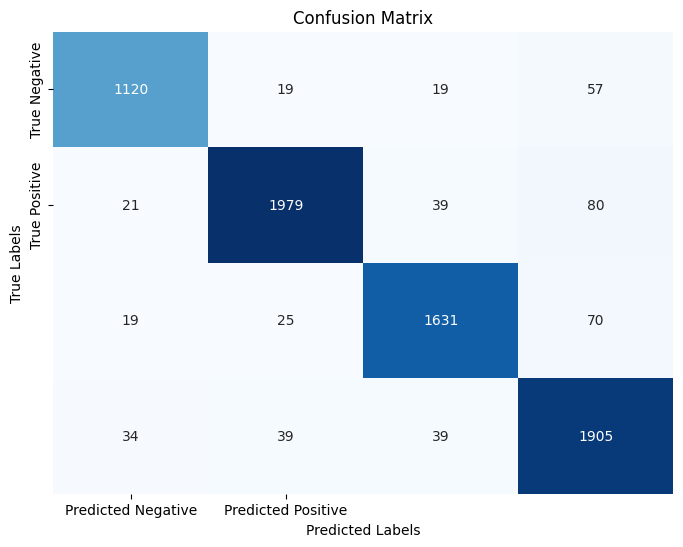

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(labels, predicted_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['True Negative', 'True Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [59]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)

def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)
    model.eval()

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_class = torch.argmax(logits, dim=-1).item()

    return predicted_class

# Example prediction
example_text = "I will murder you all"
print(predict_sentiment(example_text))


3
